## Import and inspect

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# upload file with translations in it (new col: 'comment_tr')
df = pd.read_excel('/content/drive/MyDrive/MC/Assessments/A2 & A3/scraped_data/Master files/new_final.xlsx', header=0)

In [ ]:
df.head()

,ind,comment,hashtag,source,lang,comment_tr,target,basis,prejudicial,offensive,ironic,stereotype,note
0,0,Another amazing video! So wonderful to see all...,Hazara,YouTube,en,no,NaN,NaN,NaN,n,n,n,NaN
1,1,"Beautiful people, love from Iran to my lovely ...",Hazara,YouTube,en,no,NaN,NaN,NaN,NaN,NaN,n,NaN
2,2,Love my nation Hazara,Hazara,YouTube,en,no,NaN,NaN,NaN,NaN,NaN,n,NaN
3,3,Be healthy friends,Hazara,YouTube,fa,yes,NaN,NaN,NaN,NaN,NaN,n,NaN
4,4,"Greetings, dear people",Hazara,YouTube,fa,yes,NaN,NaN,NaN,NaN,NaN,n,NaN


In [ ]:
df.drop(['ind'], axis=1, inplace=True)

Remove irrelevant rows and file

In [ ]:
# drop rows if note == Irrelevant or 01SHG7 (not in English)
df = df[~df['note'].isin(['Irrelevant', '01SHG7'])]

In [ ]:
len(df)

2533

## Transform data

Convert to binary values

In [ ]:
df['ironic'] = df['ironic'].fillna('n')
df['ironic'] = df['ironic'].replace(['n', 'y'], [0, 1]).astype('int64')
df['offensive'] = df['offensive'].fillna('n')
df['offensive'] = df['offensive'].replace(['n', 'y'], [0, 1]).astype('int64')
df['prejudicial'] = df['prejudicial'].fillna('n')
df['prejudicial'] = df['prejudicial'].replace(['n', 'y'], [0, 1]).astype('int64')

In [ ]:
# ensure 'n' values are consistent in target column
df['stereotype'] = df['stereotype'].replace({'[nN]': 'n'}, regex=True).astype('object')

In [ ]:
df.head()

,comment,hashtag,source,lang,comment_tr,target,basis,prejudicial,offensive,ironic,stereotype,note
0,Another amazing video! So wonderful to see all...,Hazara,YouTube,en,no,NaN,NaN,0,0,0,n,NaN
1,"Beautiful people, love from Iran to my lovely ...",Hazara,YouTube,en,no,NaN,NaN,0,0,0,n,NaN
2,Love my nation Hazara,Hazara,YouTube,en,no,NaN,NaN,0,0,0,n,NaN
3,Be healthy friends,Hazara,YouTube,fa,yes,NaN,NaN,0,0,0,n,NaN
4,"Greetings, dear people",Hazara,YouTube,fa,yes,NaN,NaN,0,0,0,n,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2533 entries, 0 to 2820
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   comment      2533 non-null   object
 1   hashtag      2532 non-null   object
 2   source       2532 non-null   object
 3   lang         2532 non-null   object
 4   comment_tr   2533 non-null   object
 5   target       329 non-null    object
 6   basis        254 non-null    object
 7   prejudicial  2533 non-null   int64 
 8   offensive    2533 non-null   int64 
 9   ironic       2533 non-null   int64 
 10  stereotype   549 non-null    object
 11  note         0 non-null      object
dtypes: int64(3), object(9)
memory usage: 257.3+ KB


In [ ]:
# export
df.to_excel('/content/drive/MyDrive/MC/Assessments/A2 & A3/scraped_data/Master files/df_clean_1.xlsx', header=True, index=True)

## Get levels

In [ ]:
df.hashtag.value_counts()

SHG       2036
Hazara     496
Name: hashtag, dtype: int64

In [ ]:
df.source.value_counts()

YouTube    2532
Name: source, dtype: int64

In [ ]:
df.lang.value_counts()

en    1947
es     121
fa      85
so      58
tl      33
id      32
tr      26
vi      20
it      19
ro      19
af      19
sw      18
de      17
nl      16
hu      16
et      11
fr      10
sl       8
pl       6
fi       6
ar       6
cy       6
da       5
sv       5
hr       5
no       5
sq       4
ca       3
lv       1
ur       1
cs       1
sk       1
hi       1
pt       1
Name: lang, dtype: int64

In [ ]:
df['lang'].nunique()

34

In [ ]:
df.comment_tr.value_counts()

no     2407
yes     126
Name: comment_tr, dtype: int64

In [ ]:
yes, no = df.comment_tr.value_counts()

In [ ]:
# proportion of translated comments
round(no/yes*100, 2)

5.23

In [ ]:
df.target.value_counts()

Hazaras        127
Media           46
West            29
Afghans         27
US              26
Islam           24
NGO             15
Muslims         12
Taliban          8
Pakistan         3
Pashtuns         3
China            2
Iran             2
Afghanistan      2
India            1
Hindus           1
Kharijites       1
Name: target, dtype: int64

In [ ]:
df.basis.value_counts()

Race/ ethnicity        96
Geopolitics            96
Religion               44
Physical appearance    15
Gender                  3
Name: basis, dtype: int64

In [ ]:
df.prejudicial.value_counts()

0    2212
1     321
Name: prejudicial, dtype: int64

In [ ]:
df.offensive.value_counts()

0    2384
1     149
Name: offensive, dtype: int64

In [ ]:
df.ironic.value_counts()

0    2434
1      99
Name: ironic, dtype: int64

In [ ]:
df.stereotype.value_counts()

n    295
y    254
Name: stereotype, dtype: int64

In [ ]:
n, y = df.stereotype.value_counts()

In [ ]:
n + y

549

## Class distribution

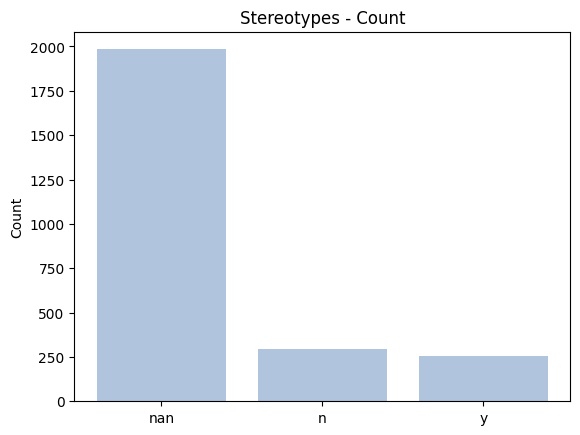

In [ ]:
import matplotlib.pyplot as plt

# Get counts of each category in the 'category' column
counts = df['stereotype'].value_counts(dropna=False)

plt.bar(counts.index.astype(str), counts.values, color='lightsteelblue')

# Add title and axis labels
plt.title('Stereotypes - Count')
plt.ylabel('Count')

# Show the plot
plt.show()


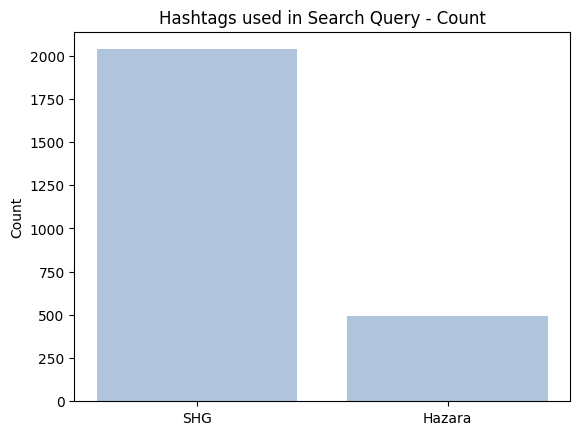

In [ ]:
import matplotlib.pyplot as plt

# Get counts of each category in the 'category' column
counts = df['hashtag'].value_counts()

plt.bar(counts.index.astype(str), counts.values, color='lightsteelblue')

# Add title and axis labels
plt.title('Hashtags used in Search Query - Count')
plt.ylabel('Count')

# Show the plot
plt.show()

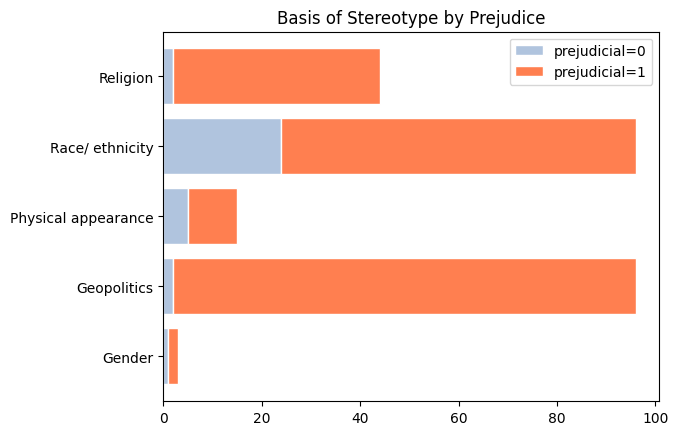

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the values and counts for the 'basis' column
values1 = df['basis'].value_counts().sort_index()

# Get the counts for the 'prejudicial' column
counts = df.groupby(['basis', 'prejudicial']).size().unstack(fill_value=0)

# Set the height of the bars
barHeight = 0.8

# Set the positions of the bars on the y-axis
r = np.arange(len(values1))

# Create the horizontal bar chart
plt.barh(r, counts[0], height=barHeight, color='lightsteelblue', edgecolor='white', label='prejudicial=0')
plt.barh(r, counts[1], height=barHeight, left=counts[0], color='coral', edgecolor='white', label='prejudicial=1')
# Add yticks on the middle of the group bars
plt.yticks(r, values1.index)
plt.legend()
plt.title('Basis of Stereotype by Prejudice')
plt.show()

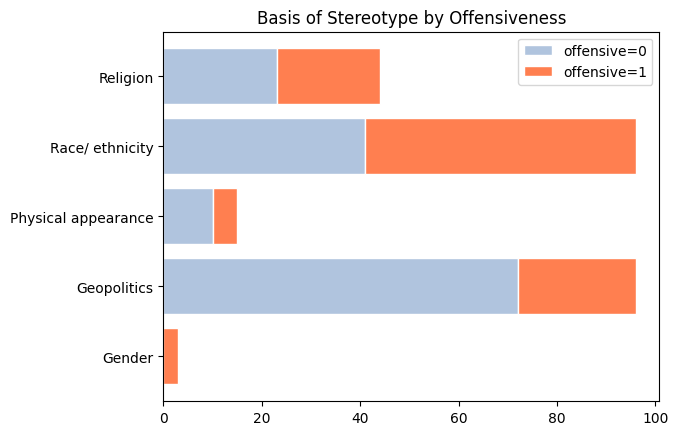

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the values and counts for the 'basis' column
values1 = df['basis'].value_counts().sort_index()

# Get the counts for the 'prejudicial' column
counts = df.groupby(['basis', 'offensive']).size().unstack(fill_value=0)

# Set the height of the bars
barHeight = 0.8

# Set the positions of the bars on the y-axis
r = np.arange(len(values1))

# Create the horizontal bar chart
plt.barh(r, counts[0], height=barHeight, color='lightsteelblue', edgecolor='white', label='offensive=0')
plt.barh(r, counts[1], height=barHeight, left=counts[0], color='coral', edgecolor='white', label='offensive=1')
# Add yticks on the middle of the group bars
plt.yticks(r, values1.index)
plt.legend()
plt.title('Basis of Stereotype by Offensiveness')
plt.show()

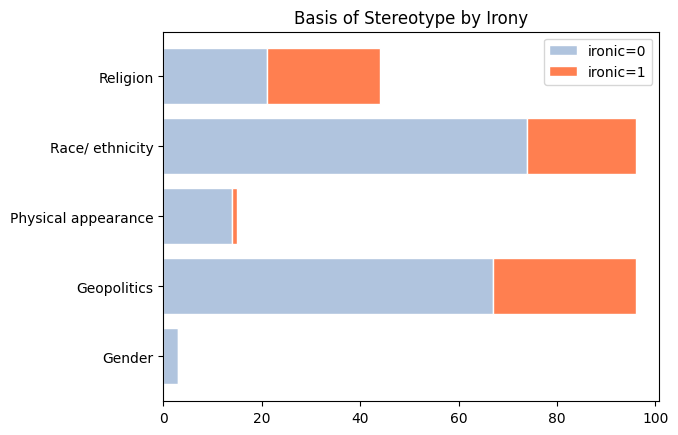

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the values and counts for the 'basis' column
values1 = df['basis'].value_counts().sort_index()

# Get the counts for the 'prejudicial' column
counts = df.groupby(['basis', 'ironic']).size().unstack(fill_value=0)

# Set the height of the bars
barHeight = 0.8

# Set the positions of the bars on the y-axis
r = np.arange(len(values1))

# Create the horizontal bar chart
plt.barh(r, counts[0], height=barHeight, color='lightsteelblue', edgecolor='white', label='ironic=0')
plt.barh(r, counts[1], height=barHeight, left=counts[0], color='coral', edgecolor='white', label='ironic=1')
# Add yticks on the middle of the group bars
plt.yticks(r, values1.index)
plt.legend()
plt.title('Basis of Stereotype by Irony')
plt.show()

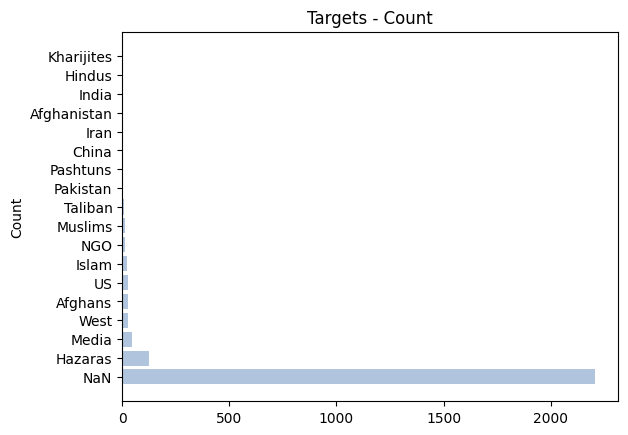

In [ ]:
import matplotlib.pyplot as plt

# Get counts of each category in the 'category' column
counts = df['target'].value_counts(dropna=False)

plt.barh(counts.index.astype(str), counts.values, color='lightsteelblue')

# Add title and axis labels
plt.title('Targets - Count')
plt.ylabel('Count')

# Show the plot
plt.show()


In [ ]:
type(df['basis'])

pandas.core.series.Series

In [ ]:
counts = df.groupby(['basis', 'prejudicial']).size().unstack(fill_value=0)
print(counts)

prejudicial           0   1
basis                      
Gender                1   2
Geopolitics           2  94
Physical appearance   5  10
Race/ ethnicity      24  72
Religion              2  42


## Descriptive statistics

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Import the needed packages
from nltk import word_tokenize

# Tokenize each item in the review column
word_tokens = [word_tokenize(comment) for comment in df.comment]

# Print out the first item of the word_tokens list
print(word_tokens[0])

['Another', 'amazing', 'video', '!', 'So', 'wonderful', 'to', 'see', 'all', 'these', 'incredibly', 'talented', 'and', 'intelligent', 'Hazara', 'men', 'and', 'women', '️️']


In [ ]:
# Create an empty list to store the length of the reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
df['n_words'] = len_tokens 

In [ ]:
mean = round(df['n_words'].mean(),2)
max = round(df['n_words'].max(),2)
min = round(df['n_words'].min(),2)
print(f'The mean number of words in a comment is \033[1m{mean}\033[0m.')
print(f'The maxiumum number of words in a comment is \033[1m{max}\033[0m.')
print(f'The minimum number of words in a comment is \033[1m{min}\033[0m.')

The mean number of words in a comment is 19.47.
The maxiumum number of words in a comment is 350.
The minimum number of words in a comment is 1.


### Word cloud

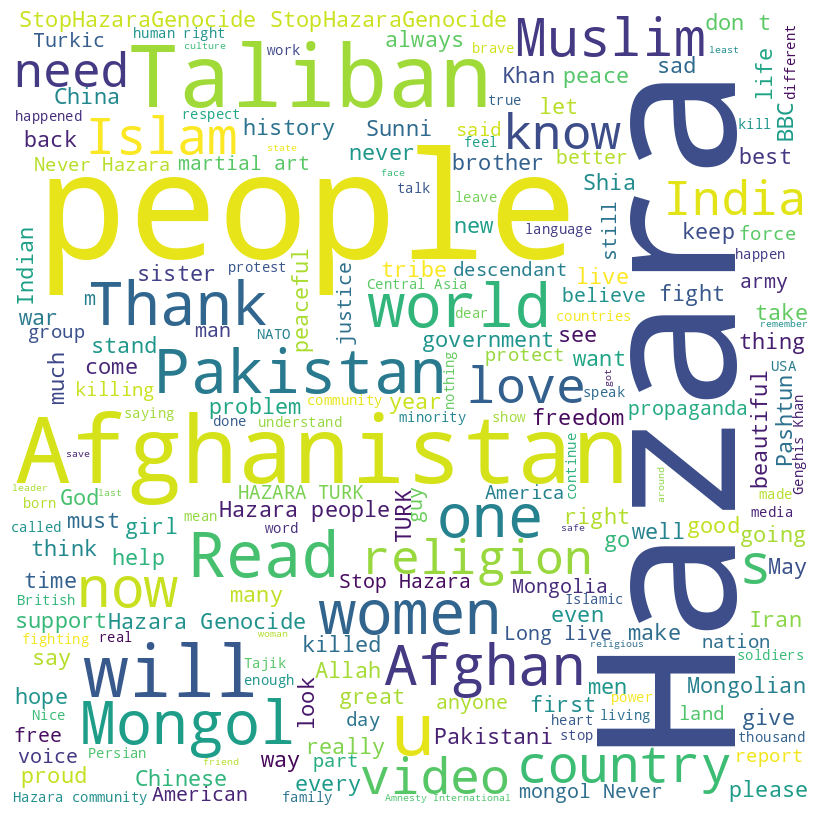

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# concatenate all comments into a single string
comments = ' '.join(df['comment'].tolist())

# generate a wordcloud from the comments
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS, # list of stopwords to exclude
                min_font_size = 10).generate(comments)

# plot the wordcloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()


## Frequency distribution 

In [ ]:
import pandas as pd
import nltk
import string
import re
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
comments

'Another amazing video! So wonderful to see all these incredibly talented and intelligent Hazara men and women ️️ Beautiful people, love from Iran to my lovely brothers and sisters Love my nation Hazara  Be healthy friends Greetings, dear people I stand with the Hazara they are Pakistani and let them live in peace. They are equal Pakistani has any Punjabi, Pathan, Urdu Speaker Kashmire. Hazara people dont give up raise the Pakistani flag high and consider your self Pakistani, We has Pakistan stand by and we will be your voice of Justice You are not a minority my dear sister, you are one of us. Beautiful film. Self defence and education for young women is the most important thing for our planet. May Allahabad bless the Hazaras of Pakistan. Proud to be hazara ️ beautiful documentary, it is inspirational Don\'t Be Scared; Get ANGRY! Fight Back! Weakness only emboldens Oppressors My dear, I am proud of each and every one of you, my sisters. I am a Hazara, wherever you are. It does not matt

In [ ]:
# create a list of the comments. 
# concatenate all comments into a single string
comments_l = ' '.join(df['comment'].tolist())

# tokenize the comments into a list of words
tokens = nltk.word_tokenize(comments_l)

# create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# get a list of stopwords
stop_words = set(stopwords.words('english'))

# define a regular expression to match punctuation marks to remove
punctuation_pattern = re.compile(r'[^\w\s’]+')

# filter out stopwords and punctuation from the list of tokens
filtered_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens 
                   if word.lower() not in stop_words 
                   and not punctuation_pattern.match(word) 
                   and word.lower() != "'s" 
                   and word.lower() != "’"
                   and word.lower() != "n't"]

# create a frequency distribution of the words
fdist = FreqDist(filtered_tokens)

# print the 10 most common words and their frequencies
print(fdist.most_common(10))

[('hazara', 579), ('people', 425), ('afghanistan', 281), ('taliban', 253), ('hazaras', 238), ('u', 176), ('woman', 175), ('read', 147), ('like', 139), ('mongol', 127)]


In [ ]:
# Instantiate lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define custom stopwords
custom_stopwords = ['via', 'rt', '...', '’', '‘', '’’', '``']

# Merge custom_stopwords with existing stopwords
stop_words.update(custom_stopwords)

# Define function for pre-processing text
def process_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    # Split hashtags into separate words
    tokens = [token[1:] if token.startswith('#') else token for token in tokens]
    tokens = [token.split('#') if '#' in token else [token] for token in tokens]
    tokens = [token for sublist in tokens for token in sublist]
    # Remove stopwords and punctuation
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    # Return pre-processed tokens
    return tokens

# Concatenate all comments into a single string
comments = ' '.join(df['comment'].tolist())

# Pre-process the text
tokens = process_text(comments)

# Count the frequency of each token
freq_dist = Counter(tokens)

# Print the 20 most common tokens
for token, freq in freq_dist.most_common(20):
    print(f"{token}: {freq}")

hazara: 579
people: 425
afghanistan: 281
taliban: 253
hazaras: 238
u: 176
woman: 175
read: 147
like: 139
mongol: 127
world: 124
one: 115
afghan: 115
country: 113
pakistan: 112
muslim: 108
god: 106
stophazaragenocide: 106
right: 87
video: 83


Find count of #StopHazaraGenocide

In [ ]:
import re

# Concatenate all comments into a single string
comments = ' '.join(df['comment'].tolist())

# Define the hashtag to search for
hashtag = "#StopHazaraGenocide"

# Define a regular expression pattern to match the hashtag in any case
pattern = re.compile(hashtag, re.IGNORECASE)

# Count the number of occurrences of the hashtag in the comments
count = len(pattern.findall(comments))

# Print the count
print(f"The hashtag {hashtag} appears {count} times in the comments.")


The hashtag #StopHazaraGenocide appears 102 times in the comments.


In [ ]:
import re

# Define the hashtag to search for
hashtag = "#StopHazaraGenocide"

# Define a regular expression pattern to match the hashtag in any case
pattern = re.compile(hashtag, re.IGNORECASE)

# Initialize a counter for the number of rows in which the hashtag appears
num_rows_with_hashtag = 0

# Loop through the comments and count the number of rows in which the hashtag appears
for comment in df['comment']:
    if pattern.search(comment):
        num_rows_with_hashtag += 1

# Print the number of rows in which the hashtag appears
print(f"The hashtag {hashtag} appears in {num_rows_with_hashtag} rows.")


The hashtag #StopHazaraGenocide appears in 100 rows.


In [ ]:
percent = round(num_rows_with_hashtag/len(df)*100, 2)
print(f"The hashtag {hashtag} appears {count} times in the comments across {num_rows_with_hashtag} rows, which is {percent}% of the total number of rows.")

The hashtag #StopHazaraGenocide appears 102 times in the comments across 100 rows, which is 3.95% of the total number of rows.
